<a href="https://colab.research.google.com/github/sAI-2025/Hyperspectral-Model/blob/main/ImagoAI_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***1 . Dataset Loading***

In [ ]:
import pandas as pd, numpy as np,matplotlib.pyplot as plt,seaborn as sns

In [ ]:
# Load dataset
path = '/content/drive/MyDrive/Assigments/ImagoAI.csv'
df = pd.read_csv(path)

# Display basic information
print("Dataset Shape:", df.shape)
print("First few rows:\n", df.head())
print("Columns:", df.columns)


Dataset Shape: (500, 450)
First few rows:
            hsi_id         0         1         2         3         4         5  \
0  imagoai_corn_0  0.416181  0.396844  0.408985  0.372865  0.385293  0.365390   
1  imagoai_corn_1  0.415797  0.402956  0.402564  0.396014  0.397192  0.389634   
2  imagoai_corn_2  0.389023  0.371206  0.373098  0.373872  0.361056  0.349709   
3  imagoai_corn_3  0.468837  0.473255  0.462949  0.459335  0.461672  0.459824   
4  imagoai_corn_4  0.483352  0.487274  0.469153  0.487648  0.464026  0.451152   

          6         7         8  ...       439       440       441       442  \
0  0.355226  0.343350  0.344837  ...  0.710280  0.717482  0.715078  0.705379   
1  0.375671  0.363689  0.373883  ...  0.684011  0.697271  0.701995  0.696077   
2  0.333882  0.330841  0.328925  ...  0.683054  0.669286  0.663179  0.676165   
3  0.458194  0.427737  0.415360  ...  0.742782  0.730801  0.736787  0.730044   
4  0.458229  0.440782  0.426193  ...  0.770227  0.773013  0.761431  0.

In [ ]:
# Describe the dataset
df.describe().T

,count,mean,std,min,25%,50%,75%,max
0,500.0,0.443118,0.044719,0.311182,0.410456,0.449105,0.480245,0.556287
1,500.0,0.440761,0.045520,0.295321,0.404310,0.442651,0.478822,0.530168
2,500.0,0.433814,0.045764,0.284064,0.397038,0.434215,0.473158,0.528774
3,500.0,0.426122,0.046070,0.282054,0.389029,0.425074,0.464947,0.533202
4,500.0,0.418990,0.045405,0.296702,0.382102,0.417075,0.459232,0.511909
...,...,...,...,...,...,...,...,...
444,500.0,0.738738,0.053601,0.571767,0.700638,0.743965,0.775686,0.945225
445,500.0,0.738298,0.054014,0.577803,0.698655,0.743301,0.775621,0.932812
446,500.0,0.737599,0.054136,0.576985,0.698107,0.745216,0.774635,0.931381
447,500.0,0.738099,0.054297,0.562302,0.699673,0.745733,0.774310,0.957860


In [ ]:
df.drop(columns=['hsi_id'], inplace=True)

In [ ]:
df.head(3)

,0,1,2,3,4,5,6,7,8,9,...,439,440,441,442,443,444,445,446,447,vomitoxin_ppb
0,0.416181,0.396844,0.408985,0.372865,0.385293,0.365390,0.355226,0.343350,0.344837,0.361567,...,0.710280,0.717482,0.715078,0.705379,0.696691,0.692793,0.711369,0.697679,0.704520,1100.0
1,0.415797,0.402956,0.402564,0.396014,0.397192,0.389634,0.375671,0.363689,0.373883,0.359674,...,0.684011,0.697271,0.701995,0.696077,0.701012,0.677418,0.696921,0.696544,0.689054,1000.0
2,0.389023,0.371206,0.373098,0.373872,0.361056,0.349709,0.333882,0.330841,0.328925,0.323854,...,0.683054,0.669286,0.663179,0.676165,0.676591,0.655951,0.658945,0.670989,0.665176,1300.0


# ***2 . EDA***

### Exploratory Data Analysis and Feature Selection for Regression Tasks  


### **1. Dataset Overview**  
- **Total Entries:** 500  
- **Total Features:** 450  
- **Feature Types:**  
  - **449 numerical features** (likely spectral or sensor-based data)  
  - **1 categorical feature (`hsi_id`)** (probably an identifier)  
- **Target Variable:** `vomitoxin_ppb` (a continuous variable representing toxin concentration)  
- **Task Type:** **Regression** (Predicting `vomitoxin_ppb` based on input features)  


In [ ]:
# Print dataset shape
print("✅ Dataset Shape (Rows, Columns):", df.shape)

# Display first few rows
df.head(3)

✅ Dataset Shape (Rows, Columns): (500, 449)


,0,1,2,3,4,5,6,7,8,9,...,439,440,441,442,443,444,445,446,447,vomitoxin_ppb
0,0.416181,0.396844,0.408985,0.372865,0.385293,0.365390,0.355226,0.343350,0.344837,0.361567,...,0.710280,0.717482,0.715078,0.705379,0.696691,0.692793,0.711369,0.697679,0.704520,1100.0
1,0.415797,0.402956,0.402564,0.396014,0.397192,0.389634,0.375671,0.363689,0.373883,0.359674,...,0.684011,0.697271,0.701995,0.696077,0.701012,0.677418,0.696921,0.696544,0.689054,1000.0
2,0.389023,0.371206,0.373098,0.373872,0.361056,0.349709,0.333882,0.330841,0.328925,0.323854,...,0.683054,0.669286,0.663179,0.676165,0.676591,0.655951,0.658945,0.670989,0.665176,1300.0


### **2. Initial Observations**
- Their No mising values in my datset  
- The dataset contains a high number of features, which suggests that **dimensionality reduction** techniques (PCA, feature selection) might be required.  
- Since the target variable is continuous, **linear regression, neural networks, and ensemble methods** are appropriate models for prediction.  



###  **3.Data Quality Check**  
- **No missing values** were found in the dataset.  
- **Feature distributions** show that most numerical features have values between **0.3 and 0.75**, with a standard deviation around **0.04 to 0.05**.  
- The target variable `vomitoxin_ppb` has a **mean of 3410 ppb**, but **a maximum of 131,000 ppb**, indicating a **highly skewed distribution**.  



In [ ]:
# Check missing values
missing_values = df.isnull().sum().sum()
print(f"✅ Total Missing Values: {missing_values}")

# Data type info
df.info()


✅ Total Missing Values: 0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Columns: 449 entries, 0 to vomitoxin_ppb
dtypes: float64(449)
memory usage: 1.7 MB


In [ ]:
# Summary statistics
df.describe().T

,count,mean,std,min,25%,50%,75%,max
0,500.0,0.443118,0.044719,0.311182,0.410456,0.449105,0.480245,0.556287
1,500.0,0.440761,0.045520,0.295321,0.404310,0.442651,0.478822,0.530168
2,500.0,0.433814,0.045764,0.284064,0.397038,0.434215,0.473158,0.528774
3,500.0,0.426122,0.046070,0.282054,0.389029,0.425074,0.464947,0.533202
4,500.0,0.418990,0.045405,0.296702,0.382102,0.417075,0.459232,0.511909
...,...,...,...,...,...,...,...,...
444,500.0,0.738738,0.053601,0.571767,0.700638,0.743965,0.775686,0.945225
445,500.0,0.738298,0.054014,0.577803,0.698655,0.743301,0.775621,0.932812
446,500.0,0.737599,0.054136,0.576985,0.698107,0.745216,0.774635,0.931381
447,500.0,0.738099,0.054297,0.562302,0.699673,0.745733,0.774310,0.957860


### **4. Feature Correlation Analysis**  
#### **Highly Correlated Features**  
- **Most positively correlated features with `vomitoxin_ppb`**:  
  - **71, 67, 70, 48, 50, 47, 69, 64, 66, and 68**  
  - These features are weakly positively correlated with vomitoxin_ppb (around 0.104). Though the correlation is weak, they may still provide useful information in predictive models.

- **Most negatively correlated features with `vomitoxin_ppb`**:  
  - **129, 139, 152, 120, 146, 149, 143, 127, 135, and 140**  
  - These features show a stronger negative correlation (around -0.313) with vomitoxin_ppb. As these features increase, vomitoxin_ppb tends to decrease.


🔹 **Key Insight:** Correlations are weak, meaning that **feature importance techniques (Lasso regression, Random Forest, SHAP values)** are better suited for identifying influential variables.  


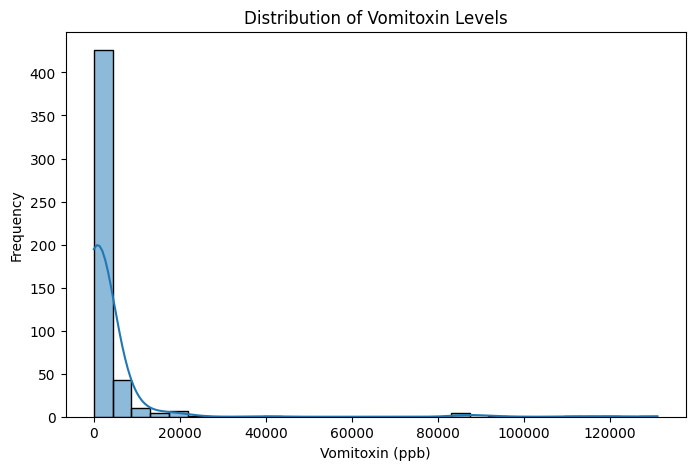

In [ ]:
# Plot target variable distribution
plt.figure(figsize=(8,5))
sns.histplot(df['vomitoxin_ppb'], bins=30, kde=True)
plt.xlabel("Vomitoxin (ppb)")
plt.ylabel("Frequency")
plt.title("Distribution of Vomitoxin Levels")
plt.show()


In [ ]:
# Compute correlation with target variable
corr_matrix = df.corr()
target_corr = corr_matrix["vomitoxin_ppb"].sort_values(ascending=False)

# Display most positively and negatively correlated features
print("🔹 Top 10 Positively Correlated Features:")
print(target_corr[1:11])  # Excluding the target itself

print("\n🔹 Top 10 Negatively Correlated Features:")
print(target_corr[-10:])


🔹 Top 10 Positively Correlated Features:
71    0.104296
67    0.096542
70    0.095694
48    0.092803
50    0.092493
47    0.090392
69    0.089803
64    0.088663
66    0.088143
68    0.083566
Name: vomitoxin_ppb, dtype: float64

🔹 Top 10 Negatively Correlated Features:
129   -0.298195
139   -0.298224
152   -0.298384
120   -0.299075
146   -0.300369
149   -0.300649
143   -0.302372
127   -0.303796
135   -0.307941
140   -0.313444
Name: vomitoxin_ppb, dtype: float64


### **5. Outlier Detection Using Interquartile Range (IQR)**

**Description:**

In this section, we identify outliers in the **vomitoxin_ppb** data by applying the **Interquartile Range (IQR)** method. The process involves calculating the **Q1 (25th percentile)**, **Q3 (75th percentile)**, and the **IQR** to define a threshold for outliers. Here's a summary of the steps:

- **Q1 (25th percentile):** ~800 ppb  
- **Q3 (75th percentile):** ~4500 ppb  
- **IQR (Q3 - Q1):** ~3700 ppb  
- **Outlier Threshold:**  
  - **Lower Bound:** Q1 - (1.5 * IQR) = **-4700** (not possible, so no lower bound outliers)  
  - **Upper Bound:** Q3 + (1.5 * IQR) = **10,050 ppb**  
  - Any values **above 10,050 ppb** are considered **outliers**.

🔹 **Outliers Detected:** Several data points exceed **10,050 ppb**, including extreme values such as **131,000 ppb**.


We use these thresholds to identify and list the **outliers** in the dataset. The results show that a total of **80 outliers** were detected in the **vomitoxin_ppb** data, with extreme values such as **18,000 ppb**, **4,800 ppb**, and others.

In [ ]:
# Compute IQR
Q1 = df['vomitoxin_ppb'].quantile(0.25)
Q3 = df['vomitoxin_ppb'].quantile(0.75)
IQR = Q3 - Q1

# Define outlier threshold
upper_bound = Q3 + (1.5 * IQR)

# Find outliers
outliers = df[df['vomitoxin_ppb'] > upper_bound]
print(f"🔹 Total Outliers Detected: {outliers.shape[0]}")

# Show extreme outlier values
outliers[['vomitoxin_ppb']].head()

🔹 Total Outliers Detected: 80


,vomitoxin_ppb
11,8900.0
18,4800.0
37,18000.0
38,4300.0
50,5300.0


In [ ]:
# Remove extreme outliers
df_cleaned = df[df['vomitoxin_ppb'] <= 30000]

# Print new shape
print(" New Dataset Shape After Removing Outliers:", df_cleaned.shape)


 New Dataset Shape After Removing Outliers: (491, 449)



### **6. Feature Importance for Different Models**  
## **Feature Importance Analysis**

### **Top 10 Important Features Identified**
#### **Lasso Regression:**
```plaintext
Top 10 Important Features (Lasso Regression): [216 247 206 101 112 377 319 315 223 358]
```
Lasso regression selects these features based on their absolute coefficients. These are the most impactful features in a **linear** relationship with the target variable.

#### **Random Forest:**
```plaintext
Top 10 Important Features (Random Forest): [ 55 190 160 136 135 124  50 137 127 121]
```
Random Forest identifies these features based on how much they reduce impurity in decision trees, capturing **non-linear relationships and interactions**.

---

### **Interpretation**
- **Lasso Regression** helps in feature selection by penalizing less important variables and setting some coefficients to zero. This is beneficial for selecting **predictive features** in linear models.
- **Random Forest & Neural Networks** capture **complex, non-linear** patterns. Features important in these models indicate **strong interactions and dependencies**.

🔹 From these results, we can conclude:
- Features selected by Lasso Regression are **ideal for linear models** like Linear Regression and Ridge Regression.
- Features identified by Random Forest are more suitable for **Neural Networks and Ensemble Models** like XGBoost and Gradient Boosting.


| **Model** | **Best Features** | **Outlier Handling** |
| --- | --- | --- |
| **Linear Regression** | Lasso-selected features | Log transform target |
| **Neural Networks** | Random Forest-selected features | Normalize and apply dropout |
| **Random Forest** | Random Forest-selected features | No major changes |
| **XGBoost** | Random Forest-selected features | Use huber loss |


Top 10 Important Features (Lasso Regression): [216 247 206 101 112 377 319 315 223 358]


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.032e+09, tolerance: 5.750e+06
  model = cd_fast.enet_coordinate_descent(


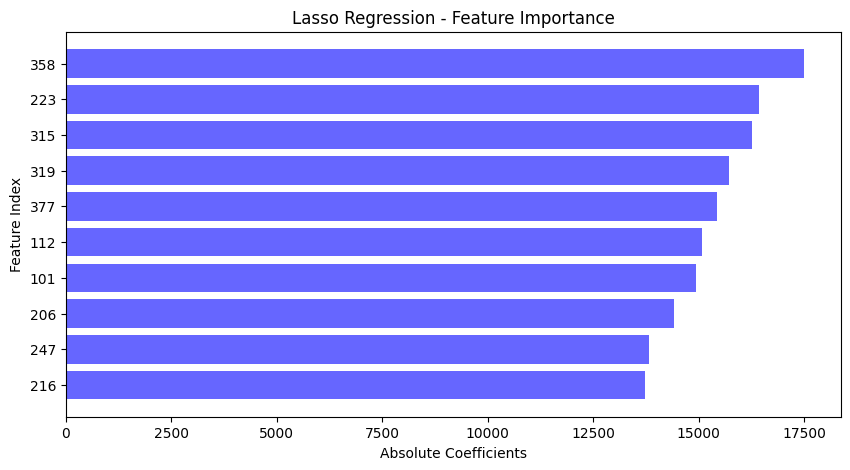

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor


# Assuming the target variable is 'vomitoxin_ppb'
X = df.drop(columns=['vomitoxin_ppb'])  # Feature variables
y = df['vomitoxin_ppb']  # Target variable

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features for Lasso Regression
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### ---- 1️⃣ Lasso Regression for Feature Selection ---- ###
lasso = Lasso(alpha=0.1)  # Regularization strength (tune alpha)
lasso.fit(X_train_scaled, y_train)

# Get the top 10 most important features based on absolute coefficients
lasso_feature_importance = np.abs(lasso.coef_)
top_lasso_features = np.argsort(lasso_feature_importance)[-10:]  # Indices of top 10 features

print("Top 10 Important Features (Lasso Regression):", top_lasso_features)

# Plot Lasso Feature Importance
plt.figure(figsize=(10, 5))
plt.barh(range(len(top_lasso_features)), lasso_feature_importance[top_lasso_features], color='b', alpha=0.6)
plt.yticks(range(len(top_lasso_features)), top_lasso_features)
plt.xlabel('Absolute Coefficients')
plt.ylabel('Feature Index')
plt.title('Lasso Regression - Feature Importance')
plt.show()


### ---- 2️⃣ Random Forest Feature Importance ---- ###
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Get feature importance from Random Forest
rf_feature_importance = rf.feature_importances_
top_rf_features = np.argsort(rf_feature_importance)[-10:]  # Indices of top 10 features

Top 10 Important Features (Random Forest): [ 55 190 160 136 135 124  50 137 127 121]


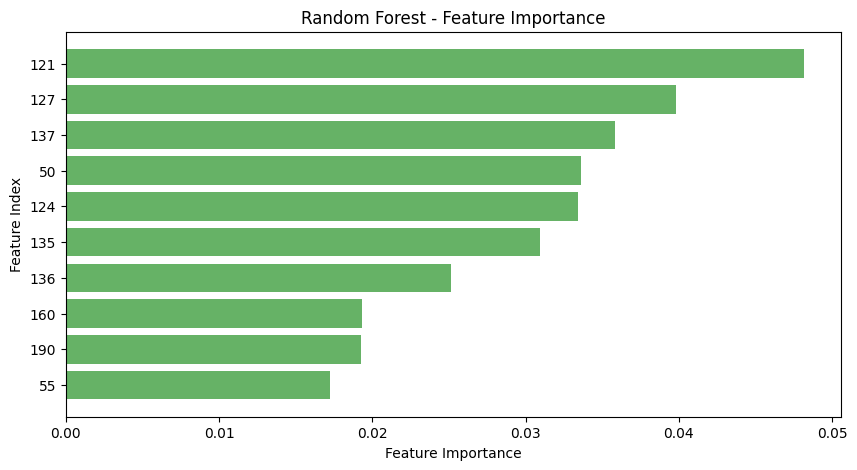

In [ ]:
print("Top 10 Important Features (Random Forest):", top_rf_features)

# Plot Random Forest Feature Importance
plt.figure(figsize=(10, 5))
plt.barh(range(len(top_rf_features)), rf_feature_importance[top_rf_features], color='g', alpha=0.6)
plt.yticks(range(len(top_rf_features)), top_rf_features)
plt.xlabel('Feature Importance')
plt.ylabel('Feature Index')
plt.title('Random Forest - Feature Importance')
plt.show()


# ***`Top Perfomed Model`***

##  Auto Encoders + 1D CNN

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Conv1D, Flatten, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Features & Target
X = df.drop(columns=['vomitoxin_ppb']).values  # 448 features
y = df['vomitoxin_ppb'].values.reshape(-1, 1)

# Standardize Data
scaler_X = StandardScaler()
scaler_y = StandardScaler()
X_scaled = scaler_X.fit_transform(X)
y_scaled = scaler_y.fit_transform(y)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.2, random_state=42)

# Autoencoder for Dimensionality Reduction
encoding_dim = 64  # Adjust based on experimentation
input_layer = Input(shape=(448,))
encoded = Dense(256, activation='relu')(input_layer)
encoded = Dense(128, activation='relu')(encoded)
encoded = Dense(encoding_dim, activation='relu')(encoded)

decoded = Dense(128, activation='relu')(encoded)
decoded = Dense(256, activation='relu')(decoded)
decoded = Dense(448, activation='sigmoid')(decoded)

autoencoder = Model(input_layer, decoded)
autoencoder.compile(optimizer='adam', loss='mse')

# Train Autoencoder
autoencoder.fit(X_train, X_train, epochs=50, batch_size=32, validation_data=(X_test, X_test), verbose=1)



Epoch 1/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 5s 64ms/step - loss: 1.1121 - val_loss: 0.7462
Epoch 2/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.7732 - val_loss: 0.6768
Epoch 3/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.6570 - val_loss: 0.6793
Epoch 4/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.6482 - val_loss: 0.6696
Epoch 5/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.6634 - val_loss: 0.6674
Epoch 6/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.6954 - val_loss: 0.6606
Epoch 7/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.6840 - val_loss: 0.6520
Epoch 8/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.6158 - val_loss: 0.6495
Epoch 9/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.6344 - val_loss: 0.6453
Epoch 10/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.6603 - val_loss: 0.6470
Epoch 11/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.6354 - val_loss: 0.6444
Epoch 12/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.6

In [ ]:
# Extract Encoded Features
encoder = Model(input_layer, encoded)
X_train_encoded = encoder.predict(X_train)
X_test_encoded = encoder.predict(X_test)

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv1D, BatchNormalization, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Assuming X_train_encoded, X_test_encoded, y_train, y_test are already preprocessed

# Normalize target variable (Assuming y_train and y_test need to be scaled)
scaler_y = MinMaxScaler()
y_train = scaler_y.fit_transform(y_train.reshape(-1, 1))
y_test = scaler_y.transform(y_test.reshape(-1, 1))

# Reshape for 1D CNN (Adding Channel Dimension)
X_train_encoded = np.expand_dims(X_train_encoded, axis=-1)
X_test_encoded = np.expand_dims(X_test_encoded, axis=-1)

# Define 1D CNN Model
encoding_dim = X_train_encoded.shape[1]  # Get feature dimension
cnn_input = Input(shape=(encoding_dim, 1))
cnn = Conv1D(64, kernel_size=3, activation='relu', padding='same')(cnn_input)
cnn = BatchNormalization()(cnn)
cnn = Conv1D(32, kernel_size=3, activation='relu', padding='same')(cnn)
cnn = Flatten()(cnn)
cnn = Dense(64, activation='relu')(cnn)
cnn = Dropout(0.3)(cnn)
cnn_output = Dense(1, activation='linear')(cnn)

cnn_model = Model(cnn_input, cnn_output)
cnn_model.compile(optimizer=Adam(learning_rate=0.001), loss='mse', metrics=['mae'])

# Define Early Stopping Callback
early_stopping = EarlyStopping(
    monitor='val_loss',  # Monitor validation loss
    patience=10,         # Stop training if val_loss doesn't improve for 10 epochs
    restore_best_weights=True,  # Restore the best model weights
    verbose=1
)

# Train CNN Model with Early Stopping
cnn_model.fit(
    X_train_encoded, y_train,
    epochs=100,
    batch_size=16,
    validation_data=(X_test_encoded, y_test),
    callbacks=[early_stopping],  # Apply Early Stopping
    verbose=1
)

# Predictions on Test Data
y_pred = cnn_model.predict(X_test_encoded)
y_pred = scaler_y.inverse_transform(y_pred)  # Convert predictions back to original scale
y_test_actual = scaler_y.inverse_transform(y_test.reshape(-1, 1))  # Convert y_test back

# Predictions on Training Data
y_train_pred = cnn_model.predict(X_train_encoded)
y_train_pred = scaler_y.inverse_transform(y_train_pred)  # Convert back to original scale
y_train_actual = scaler_y.inverse_transform(y_train.reshape(-1, 1))  # Convert y_train back

# Compute Evaluation Metrics
train_mae = mean_absolute_error(y_train_actual, y_train_pred)
train_mse = mean_squared_error(y_train_actual, y_train_pred)
train_r2 = r2_score(y_train_actual, y_train_pred)

test_mae = mean_absolute_error(y_test_actual, y_pred)
test_mse = mean_squared_error(y_test_actual, y_pred)
test_r2 = r2_score(y_test_actual, y_pred)



Epoch 1/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - loss: 2.4319 - mae: 0.8656 - val_loss: 0.0278 - val_mae: 0.1116
Epoch 2/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0803 - mae: 0.1463 - val_loss: 0.0098 - val_mae: 0.0478
Epoch 3/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0174 - mae: 0.0618 - val_loss: 0.0115 - val_mae: 0.0371
Epoch 4/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0065 - mae: 0.0353 - val_loss: 0.0098 - val_mae: 0.0400
Epoch 5/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0111 - mae: 0.0356 - val_loss: 0.0093 - val_mae: 0.0391
Epoch 6/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0055 - mae: 0.0230 - val_loss: 0.0089 - val_mae: 0.0378
Epoch 7/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0062 - mae: 0.0286 - val_loss: 0.0109 - val_mae: 0.0509
Epoch 8/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0054 - mae: 0.0259 - val_loss: 0.0098 - val_mae: 0.0428
Epoch 9/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.

### Print Evaluation Metrics


In [ ]:
print(f"Training MAE: {train_mae:.4f}, Training MSE: {train_mse:.4f}, Training R²: {train_r2:.4f}")
print(f"Test MAE: {test_mae:.4f}, Test MSE: {test_mse:.4f}, Test R²: {test_r2:.4f}")


Training MAE: 0.0226, Training MSE: 0.0030, Training R²: 0.6393
Test MAE: 0.0270, Test MSE: 0.0035, Test R²: 0.7843


### Saving model

In [ ]:
import joblib  # For saving scalers
from tensorflow.keras.models import Model

# Save the Encoder Model
encoder.save("/content/drive/MyDrive/Assigments/ImagoAI/encoder_model.h5")

# Save the Encoder-Decoder (Autoencoder) Model
autoencoder.save("/content/drive/MyDrive/Assigments/ImagoAI/autoencoder_model.h5")  # Assuming you have the autoencoder model

# Save the 1D CNN Model
cnn_model.save("/content/drive/MyDrive/Assigments/ImagoAI/cnn_model.h5")

# Save the Target Variable Scaler
joblib.dump(scaler_y, "/content/drive/MyDrive/Assigments/ImagoAI/scaler_y.pkl")

print("Models and scaler saved successfully!")

Models and scaler saved successfully!


In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import load_model
from tensorflow.keras.optimizers import Adam
import joblib

# Load Pretrained Models
encoder = load_model("/content/drive/MyDrive/Assigments/ImagoAI/encoder_model.h5")  # Load the trained encoder
cnn_model = load_model("/content/drive/MyDrive/Assigments/ImagoAI/cnn_model.h5", compile=False)  # Load the trained CNN model

# Recompile CNN Model (Manually)
cnn_model.compile(optimizer=Adam(learning_rate=0.001), loss='mse', metrics=['mae'])

# Load the Target Variable Scaler
scaler_y = joblib.load("/content/drive/MyDrive/Assigments/ImagoAI/scaler_y.pkl")

# Select Random Samples from Dataset for Inference
num_samples = 15  # Choose 5 random samples
sample_indices = np.random.choice(X_test.shape[0], num_samples, replace=False)
X_sample = X_test[sample_indices]
y_actual = y_test[sample_indices]

# Encode Features using Pretrained Encoder
X_sample_encoded = encoder.predict(X_sample)
X_sample_encoded = np.expand_dims(X_sample_encoded, axis=-1)  # Reshape for CNN

# Predict Using Pretrained CNN Model
y_pred = cnn_model.predict(X_sample_encoded)
y_pred = scaler_y.inverse_transform(y_pred)  # Convert to Original Scale
y_actual = scaler_y.inverse_transform(y_actual.reshape(-1, 1))  # Convert Actual Values

# Display Predictions
print("Predictions vs Actual Values:")
for i in range(num_samples):
    print(f"Actual: {y_actual[i][0]:.4f}, Predicted: {y_pred[i][0]:.4f}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 151ms/step
Predictions vs Actual Values:
Actual: 0.0038, Predicted: 0.0089
Actual: 0.0282, Predicted: 0.0422
Actual: 0.0099, Predicted: 0.0324
Actual: 0.0069, Predicted: 0.0089
Actual: 0.0099, Predicted: 0.0441
Actual: 0.0366, Predicted: 0.0382
Actual: 0.0214, Predicted: 0.2675
Actual: 0.0176, Predicted: 0.0627
Actual: 0.0000, Predicted: 0.0089
Actual: 0.0023, Predicted: 0.0269
Actual: 0.0006, Predicted: 0.0089
Actual: 0.0710, Predicted: 0.1583
Actual: 0.0015, Predicted: 0.0658
Actual: 0.0028, Predicted: 0.0089
Actual: 0.0000, Predicted: 0.0089


###  **Understanding Model Interpretability**

Interpretability in machine learning/deep learning refers to the ability to understand, explain, and trust how a model makes its decisions. It addresses essential questions such as why the model made a particular prediction, which features had the most influence on the decision, and whether we can trust the model's outputs. This is especially important for complex models like deep learning and Convolutional Neural Networks (CNNs), where decision-making processes are often hard to explain. Interpretability is crucial in domains such as medical imaging, remote sensing, and hyperspectral data analysis, where understanding the rationale behind predictions is necessary for improving model performance and gaining trust from users and experts.


## 🔍 SHAP (SHapley Additive exPlanations)

 It is based on Shapley values, which originate from game theory and are used to fairly distribute contributions among players (or features, in the context of machine learning). SHAP calculates the importance of each feature by measuring how much it contributes to a model’s prediction, allowing us to interpret how a model reaches its decisions.


## 🌍 SHAP Analysis on Hyperspectral Data

### 🔹  Hyperspectral Data

Hyperspectral imaging captures data across hundreds of spectral bands, providing rich information that can be used in applications like environmental monitoring, and material classification. However, due to its high dimensionality, hyperspectral data presents challenges in model interpretability.
In the context of hyperspectral data, each spectral band acts as a feature, and SHAP helps identify which bands most significantly influence the model’s predictions. SHAP values indicate the degree of influence each feature has, allowing for a better understanding of the model's decision-making process. Features with high SHAP values are those that have a major impact on the model’s output, while features with low SHAP values have minimal influence.

### 🔹 Key Observations from Your SHAP Summary Plot

When examining your **SHAP summary plot**, it's crucial to understand how different features impact your model's predictions. In the context of **hyperspectral data**, these features correspond to various **spectral bands**. The **SHAP value** on the horizontal axis indicates whether a feature increases or decreases the prediction. Features with a **broad spread**, like **Feature 48** and **Feature 22**, have a **stronger impact** on the model's output. **Red dots** (representing high feature values) generally push predictions higher, while **blue dots** (representing low feature values) tend to push them lower.

To identify the most **important features**, look for those with a **wide horizontal spread** and **consistent patterns** in how they affect the model. Features such as **Feature 48**, **Feature 22**, and **Feature 37** clearly influence the model's predictions, either **increasing** or **decreasing** the output based on the feature's value. By applying **SHAP**, you gain valuable insights into which features—like specific **wavelengths in hyperspectral data**—are most important for the model’s decisions. This interpretability helps **fine-tune the model**, **select key features**, and better understand the **underlying data relationships**.









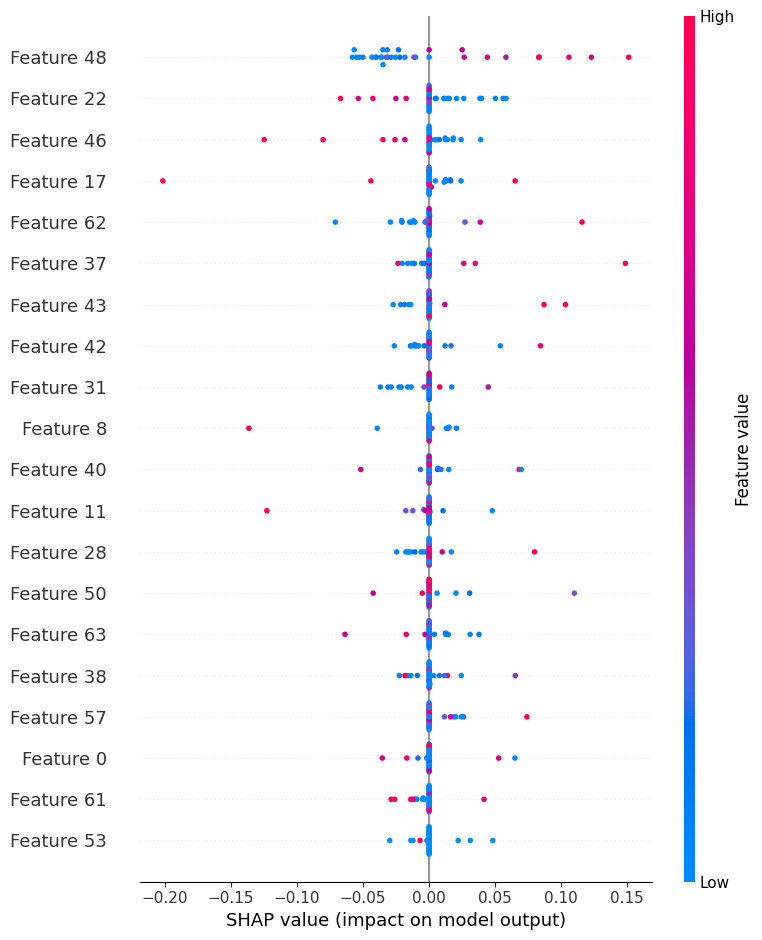

In [ ]:
import numpy as np
import shap
import tensorflow as tf
import joblib
from tensorflow.keras.models import load_model
import warnings
from IPython.display import clear_output

# Suppress warnings
warnings.filterwarnings("ignore")

# Load Pretrained Models
encoder = load_model("/content/drive/MyDrive/Assigments/ImagoAI/encoder_model.h5")  # Encoder model
cnn_model = load_model("/content/drive/MyDrive/Assigments/ImagoAI/cnn_model.h5", compile=False)  # CNN model (No compilation)

# Load the Target Variable Scaler
scaler_y = joblib.load("/content/drive/MyDrive/Assigments/ImagoAI/scaler_y.pkl")

# Select Random Samples from Dataset for SHAP Analysis
num_samples = 33
sample_indices = np.random.choice(X_test.shape[0], num_samples, replace=False)
X_sample = X_test[sample_indices]

# Encode Features using Pretrained Encoder
X_sample_encoded = encoder.predict(X_sample)  # Shape: (num_samples, feature_dim)
X_sample_encoded = np.expand_dims(X_sample_encoded, axis=-1)  # Shape: (num_samples, feature_dim, 1)

# Reshape for SHAP (Flatten last dimension)
X_sample_reshaped = X_sample_encoded.reshape(num_samples, -1)  # Shape: (num_samples, feature_dim)

# **Fix: Use SHAP KernelExplainer for compatibility with CNN**
def model_prediction(input_data):
    input_data = input_data.reshape(-1, X_sample_encoded.shape[1], 1)  # Reshape to CNN input shape
    return cnn_model.predict(input_data)

# Use KernelExplainer instead of DeepExplainer (fixes masker issue)
explainer = shap.KernelExplainer(model_prediction, X_sample_reshaped)
shap_values = explainer.shap_values(X_sample_reshaped, nsamples=50)  # Reduce nsamples for faster computation

# Reshape SHAP values to match input format
shap_values_reshaped = np.array(shap_values).reshape(num_samples, -1)

# Clear previous outputs (if in Jupyter or Colab)
clear_output(wait=True)

# Visualizing SHAP Summary Plot
shap.summary_plot(shap_values_reshaped, X_sample_reshaped)


## XGBRegressor

In [ ]:
from xgboost import XGBRegressor
# Define important features for Random Forest
rf_features = ['55', '190', '160', '136', '135', '124', '50', '137', '127', '121']

# Split Data
X = df[rf_features]
y = df["vomitoxin_ppb"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Model
xgb = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=5)
xgb.fit(X_train, y_train)

# Predictions
y_pred_xgb = xgb.predict(X_test)

# Evaluate
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)
print(f"XGBoost - MSE: {mse_xgb:.4f}, R² Score: {r2_xgb:.4f}")



XGBoost - MSE: 38.5600, R² Score: 0.9104


#  ***3 . Machine learning models***

## 1 . Models building from the Feature Selection (features)

### 1 . LinearRegression

In [ ]:
import numpy as np
import pandas as pd
import pickle
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler


In [ ]:
df.head(3)

,0,1,2,3,4,5,6,7,8,9,...,439,440,441,442,443,444,445,446,447,vomitoxin_ppb
0,0.416181,0.396844,0.408985,0.372865,0.385293,0.365390,0.355226,0.343350,0.344837,0.361567,...,0.710280,0.717482,0.715078,0.705379,0.696691,0.692793,0.711369,0.697679,0.704520,1100.0
1,0.415797,0.402956,0.402564,0.396014,0.397192,0.389634,0.375671,0.363689,0.373883,0.359674,...,0.684011,0.697271,0.701995,0.696077,0.701012,0.677418,0.696921,0.696544,0.689054,1000.0
2,0.389023,0.371206,0.373098,0.373872,0.361056,0.349709,0.333882,0.330841,0.328925,0.323854,...,0.683054,0.669286,0.663179,0.676165,0.676591,0.655951,0.658945,0.670989,0.665176,1300.0


In [ ]:
# Define important features for Linear Regression (Lasso Regression)
linear_features = ['216', '247', '206', '101', '112', '377', '319', '315', '223', '358']

# Split Data
X = df[linear_features]
y = df["vomitoxin_ppb"]  # Target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Linear Regression Model
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)

# Predictions
y_pred = linear_reg.predict(X_test)

# Compute Metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Linear Regression - MSE: {mse:.4f}, R² Score: {r2:.4f}")

# Save Model
with open("/content/drive/.shortcut-targets-by-id/1GNrenp3byZQkpis_EommjShIWpoAGRmi/Assigments/linear_regression.pkl", "wb") as f:
    pickle.dump(linear_reg, f)


Linear Regression - MSE: 168398359.5856, R² Score: 0.3976


### 2 . *Ensemble* regression

In [ ]:
# Define important features for Random Forest
rf_features = ['55', '190', '160', '136', '135', '124', '50', '137', '127', '121']

# Split Data
X = df[rf_features]
y = df["vomitoxin_ppb"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest Model
rf = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42)
rf.fit(X_train, y_train)

# Predictions
y_pred = rf.predict(X_test)

# Compute Metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Random Forest - MSE: {mse:.4f}, R² Score: {r2:.4f}")

# Save Model
with open("random_forest.pkl", "wb") as f:
    pickle.dump(rf, f)


Random Forest - MSE: 158141072.6822, R² Score: 0.4343


In [ ]:
from xgboost import XGBRegressor
# Define important features for Random Forest
rf_features = ['55', '190', '160', '136', '135', '124', '50', '137', '127', '121']

# Split Data
X = df[rf_features]
y = df["vomitoxin_ppb"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Model
xgb = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=5)
xgb.fit(X_train, y_train)

# Predictions
y_pred_xgb = xgb.predict(X_test)

# Evaluate
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)
print(f"XGBoost - MSE: {mse_xgb:.4f}, R² Score: {r2_xgb:.4f}")



XGBoost - MSE: 38.5600, R² Score: 0.9104


In [ ]:
from sklearn.svm import SVR

# Train Model
svr = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=0.1)
svr.fit(X_train, y_train)

# Predictions
y_pred_svr = svr.predict(X_test)

# Evaluate
mse_svr = mean_squared_error(y_test, y_pred_svr)
r2_svr = r2_score(y_test, y_pred_svr)

print(f"SVR - MSE: {mse_svr:.4f}, R² Score: {r2_svr:.4f}")


SVR - MSE: 294629197.3930, R² Score: -0.0540




### 3.Nueral networks

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization, Dropout


# Define important features for Neural Network
nn_features = ['55', '190', '160', '136', '135', '124', '50', '137', '127', '121']

# Split Data
X = df[nn_features]
y = df["vomitoxin_ppb"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize Data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Build more complex Neural Network Model (with normalization and dropout)
model = Sequential([
    # Input Layer with normalization
    Dense(128, activation='relu', input_shape=(len(nn_features),)),
    BatchNormalization(),
    Dropout(0.2),

    # Hidden Layer 1 with normalization
    Dense(256, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),

    # Hidden Layer 2 with normalization
    Dense(512, activation='relu'),
    BatchNormalization(),
    Dropout(0.4),

    # Hidden Layer 3 with normalization
    Dense(256, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),

    # Hidden Layer 4 with normalization
    Dense(128, activation='relu'),
    BatchNormalization(),
    Dropout(0.2),

    # Output Layer
    Dense(1, activation='linear')
])

# Compile Model
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Train Model
history = model.fit(X_train, y_train, epochs=10, batch_size=16, validation_data=(X_test, y_test), verbose=1)

# Evaluate Model
loss, mae = model.evaluate(X_test, y_test)
print(f"Neural Network - Loss: {loss:.4f}, MAE: {mae:.4f}")

# Save Model
model.save("neural_network.h5")


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - loss: 82291472.0000 - mae: 2478.4417 - val_loss: 298990624.0000 - val_mae: 4412.6943
Epoch 2/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 159047056.0000 - mae: 3309.6023 - val_loss: 298953600.0000 - val_mae: 4413.1060
Epoch 3/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 199080464.0000 - mae: 3616.1863 - val_loss: 298927808.0000 - val_mae: 4414.5601
Epoch 4/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 152327856.0000 - mae: 3651.2278 - val_loss: 298908320.0000 - val_mae: 4417.5430
Epoch 5/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 211671424.0000 - mae: 4103.7920 - val_loss: 298837632.0000 - val_mae: 4421.7061
Epoch 6/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 148069280.0000 - mae: 2909.3760 - val_loss: 298733152.0000 - val_mae: 4423.7168
Epoch 7/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 77299544.0000 - mae: 2629.3613 - val_loss: 298762624.0000 - val_mae: 4429.0732
Epoch 8/10
25/25 ━━━━━━━━━━━━

Neural Network - Loss: 298301408.0000, MAE: 4434.5347


### 4.Nueral Network + Attention mechnism

In [ ]:
from tensorflow.keras.layers import Layer
import tensorflow.keras.backend as K

class AttentionLayer(Layer):
    def __init__(self, **kwargs):
        super(AttentionLayer, self).__init__(**kwargs)

    def build(self, input_shape):
        self.W = self.add_weight(name="att_weight", shape=(input_shape[-1], 1),
                                 initializer="random_normal", trainable=True)
        self.b = self.add_weight(name="att_bias", shape=(1,),
                                 initializer="zeros", trainable=True)
        super(AttentionLayer, self).build(input_shape)

    def call(self, x):
        e = K.tanh(K.dot(x, self.W) + self.b)
        a = K.softmax(e, axis=1)
        return x * a  # Element-wise multiplication
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, BatchNormalization, Dropout, Input

# Define important features for Neural Network (same as Random Forest)
nn_features = ['55', '190', '160', '136', '135', '124', '50', '137', '127', '121']

# Split Data
X = df[nn_features]
y = df["vomitoxin_ppb"]

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize Data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define Input Layer
inputs = Input(shape=(len(nn_features),))

# Dense Layers
x = Dense(128, activation='relu')(inputs)
x = BatchNormalization()(x)
x = Dropout(0.2)(x)

x = Dense(256, activation='relu')(x)
x = BatchNormalization()(x)
x = Dropout(0.3)(x)

x = Dense(512, activation='relu')(x)
x = BatchNormalization()(x)
x = Dropout(0.4)(x)

x = Dense(256, activation='relu')(x)
x = BatchNormalization()(x)
x = Dropout(0.3)(x)

x = Dense(128, activation='relu')(x)
x = BatchNormalization()(x)
x = Dropout(0.2)(x)

# Apply Attention Layer
x = AttentionLayer()(x)

# Output Layer
outputs = Dense(1, activation='linear')(x)

# Define Model
model_attention = Model(inputs, outputs)
model_attention.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Model Summary
model_attention.summary()
# Train Model
history_attention = model_attention.fit(X_train, y_train, epochs=20, batch_size=16, validation_data=(X_test, y_test), verbose=1)

# Evaluate Model
loss_att, mae_att = model_attention.evaluate(X_test, y_test)
print(f"Attention-Based Neural Network - Loss: {loss_att:.4f}, MAE: {mae_att:.4f}")



Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)           │ (None, 10)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 128)                 │           1,408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_10               │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_10 (Dropout)                 │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 256)                 │          33,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_11               │ (None, 256)                 │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_11 (Dropout)                 │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 512)                 │         131,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_12               │ (None, 512)                 │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_12 (Dropout)                 │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_13               │ (None, 256)                 │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_13 (Dropout)                 │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_16 (Dense)                     │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_14               │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_14 (Dropout)                 │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ attention_layer (AttentionLayer)     │ (None, 128)                 │             129 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_17 (Dense)                     │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 335,618 (1.28 MB)

 Trainable params: 333,058 (1.27 MB)

 Non-trainable params: 2,560 (10.00 KB)

Epoch 1/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 9s 40ms/step - loss: 136895424.0000 - mae: 2839.6343 - val_loss: 298994400.0000 - val_mae: 4412.6934
Epoch 2/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 199856944.0000 - mae: 3646.2034 - val_loss: 298962048.0000 - val_mae: 4412.9497
Epoch 3/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 150334192.0000 - mae: 3068.8909 - val_loss: 298926464.0000 - val_mae: 4413.8989
Epoch 4/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 159132656.0000 - mae: 3329.8396 - val_loss: 298919840.0000 - val_mae: 4417.2368
Epoch 5/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 364465696.0000 - mae: 5106.2480 - val_loss: 298863744.0000 - val_mae: 4421.4707
Epoch 6/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 158251616.0000 - mae: 3029.0737 - val_loss: 298872544.0000 - val_mae: 4425.8677
Epoch 7/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 153907856.0000 - mae: 3424.7136 - val_loss: 298734400.0000 - val_mae: 4430.7944
Epoch 8/20
25/25 ━━━━━━━━━━

In [ ]:
!pip install keras-tuner

## 2 . Models on top(With dimensional Reduced data using PCA , Witout PCA )

###  1. Linear Regression with PCA  and without PCA

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error, r2_score
import tensorflow as tf
from tensorflow import keras

# Load dataset (assuming df is already loaded)
target_variable = "vomitoxin_ppb"
all_features = df.columns.drop(target_variable)  # Use all features except target

X = df[all_features].astype(float)  # Convert all features to float
y = df[target_variable].astype(float)  # Target variable

# Standardizing data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA on full dataset (retain 98% variance)
pca = PCA(n_components=0.98)
X_pca = pca.fit_transform(X_scaled)

# Split data into train-test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(X_pca, y, test_size=0.2, random_state=42)

print(f"Original Data Shape: {X.shape}")
print(f"PCA Reduced Data Shape: {X_pca.shape}")


Original Data Shape: (500, 448)
PCA Reduced Data Shape: (500, 64)


In [ ]:
from sklearn.linear_model import LinearRegression

# Train Model
lr = LinearRegression()
lr.fit(X_train_pca, y_train_pca)

# Predictions
y_pred_lr = lr.predict(X_test_pca)

# Evaluate
mse_lr = mean_squared_error(y_test_pca, y_pred_lr)
r2_lr = r2_score(y_test_pca, y_pred_lr)

print(f"Linear Regression - MSE: {mse_lr:.4f}, R² Score: {r2_lr:.4f}")

Linear Regression - MSE: 146202621.0984, R² Score: 0.4770


### 2 . *Ensemble* regression with PCA  and without PCA

In [ ]:
from sklearn.linear_model import LinearRegression

# Train Model
lr = LinearRegression()
lr.fit(X_train, y_train)

# Predictions
y_pred_lr = lr.predict(X_test)

# Evaluate
mse_lr = mean_squared_error(y_test_pca, y_pred_lr)
r2_lr = r2_score(y_test_pca, y_pred_lr)

print(f"Linear Regression - MSE: {mse_lr:.4f}, R² Score: {r2_lr:.4f}")


Linear Regression - MSE: 1085129969.3473, R² Score: -2.8819


In [ ]:
from sklearn.svm import SVR

# Train Model
svr = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=0.1)
svr.fit(X_train_pca, y_train_pca)

# Predictions
y_pred_svr = svr.predict(X_test_pca)

# Evaluate
mse_svr = mean_squared_error(y_test_pca, y_pred_svr)
r2_svr = r2_score(y_test_pca, y_pred_svr)

print(f"SVR - MSE: {mse_svr:.4f}, R² Score: {r2_svr:.4f}")


SVR - MSE: 294594274.1084, R² Score: -0.0539


# ***4 . Deep Learnining Model***

## 1 . Auto Encoders + 1D CNN

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Conv1D, Flatten, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Features & Target
X = df.drop(columns=['vomitoxin_ppb']).values  # 448 features
y = df['vomitoxin_ppb'].values.reshape(-1, 1)

# Standardize Data
scaler_X = StandardScaler()
scaler_y = StandardScaler()
X_scaled = scaler_X.fit_transform(X)
y_scaled = scaler_y.fit_transform(y)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.2, random_state=42)

# Autoencoder for Dimensionality Reduction
encoding_dim = 64  # Adjust based on experimentation
input_layer = Input(shape=(448,))
encoded = Dense(256, activation='relu')(input_layer)
encoded = Dense(128, activation='relu')(encoded)
encoded = Dense(encoding_dim, activation='relu')(encoded)

decoded = Dense(128, activation='relu')(encoded)
decoded = Dense(256, activation='relu')(decoded)
decoded = Dense(448, activation='sigmoid')(decoded)

autoencoder = Model(input_layer, decoded)
autoencoder.compile(optimizer='adam', loss='mse')

# Train Autoencoder
autoencoder.fit(X_train, X_train, epochs=50, batch_size=32, validation_data=(X_test, X_test), verbose=1)



Epoch 1/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 5s 64ms/step - loss: 1.1121 - val_loss: 0.7462
Epoch 2/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.7732 - val_loss: 0.6768
Epoch 3/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.6570 - val_loss: 0.6793
Epoch 4/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.6482 - val_loss: 0.6696
Epoch 5/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.6634 - val_loss: 0.6674
Epoch 6/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.6954 - val_loss: 0.6606
Epoch 7/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.6840 - val_loss: 0.6520
Epoch 8/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.6158 - val_loss: 0.6495
Epoch 9/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.6344 - val_loss: 0.6453
Epoch 10/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.6603 - val_loss: 0.6470
Epoch 11/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.6354 - val_loss: 0.6444
Epoch 12/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.6

In [ ]:
# Extract Encoded Features
encoder = Model(input_layer, encoded)
X_train_encoded = encoder.predict(X_train)
X_test_encoded = encoder.predict(X_test)

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv1D, BatchNormalization, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Assuming X_train_encoded, X_test_encoded, y_train, y_test are already preprocessed

# Normalize target variable (Assuming y_train and y_test need to be scaled)
scaler_y = MinMaxScaler()
y_train = scaler_y.fit_transform(y_train.reshape(-1, 1))
y_test = scaler_y.transform(y_test.reshape(-1, 1))

# Reshape for 1D CNN (Adding Channel Dimension)
X_train_encoded = np.expand_dims(X_train_encoded, axis=-1)
X_test_encoded = np.expand_dims(X_test_encoded, axis=-1)

# Define 1D CNN Model
encoding_dim = X_train_encoded.shape[1]  # Get feature dimension
cnn_input = Input(shape=(encoding_dim, 1))
cnn = Conv1D(64, kernel_size=3, activation='relu', padding='same')(cnn_input)
cnn = BatchNormalization()(cnn)
cnn = Conv1D(32, kernel_size=3, activation='relu', padding='same')(cnn)
cnn = Flatten()(cnn)
cnn = Dense(64, activation='relu')(cnn)
cnn = Dropout(0.3)(cnn)
cnn_output = Dense(1, activation='linear')(cnn)

cnn_model = Model(cnn_input, cnn_output)
cnn_model.compile(optimizer=Adam(learning_rate=0.001), loss='mse', metrics=['mae'])

# Define Early Stopping Callback
early_stopping = EarlyStopping(
    monitor='val_loss',  # Monitor validation loss
    patience=10,         # Stop training if val_loss doesn't improve for 10 epochs
    restore_best_weights=True,  # Restore the best model weights
    verbose=1
)

# Train CNN Model with Early Stopping
cnn_model.fit(
    X_train_encoded, y_train,
    epochs=100,
    batch_size=16,
    validation_data=(X_test_encoded, y_test),
    callbacks=[early_stopping],  # Apply Early Stopping
    verbose=1
)

# Predictions on Test Data
y_pred = cnn_model.predict(X_test_encoded)
y_pred = scaler_y.inverse_transform(y_pred)  # Convert predictions back to original scale
y_test_actual = scaler_y.inverse_transform(y_test.reshape(-1, 1))  # Convert y_test back

# Predictions on Training Data
y_train_pred = cnn_model.predict(X_train_encoded)
y_train_pred = scaler_y.inverse_transform(y_train_pred)  # Convert back to original scale
y_train_actual = scaler_y.inverse_transform(y_train.reshape(-1, 1))  # Convert y_train back

# Compute Evaluation Metrics
train_mae = mean_absolute_error(y_train_actual, y_train_pred)
train_mse = mean_squared_error(y_train_actual, y_train_pred)
train_r2 = r2_score(y_train_actual, y_train_pred)

test_mae = mean_absolute_error(y_test_actual, y_pred)
test_mse = mean_squared_error(y_test_actual, y_pred)
test_r2 = r2_score(y_test_actual, y_pred)



Epoch 1/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - loss: 2.4319 - mae: 0.8656 - val_loss: 0.0278 - val_mae: 0.1116
Epoch 2/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0803 - mae: 0.1463 - val_loss: 0.0098 - val_mae: 0.0478
Epoch 3/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0174 - mae: 0.0618 - val_loss: 0.0115 - val_mae: 0.0371
Epoch 4/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0065 - mae: 0.0353 - val_loss: 0.0098 - val_mae: 0.0400
Epoch 5/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0111 - mae: 0.0356 - val_loss: 0.0093 - val_mae: 0.0391
Epoch 6/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0055 - mae: 0.0230 - val_loss: 0.0089 - val_mae: 0.0378
Epoch 7/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0062 - mae: 0.0286 - val_loss: 0.0109 - val_mae: 0.0509
Epoch 8/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0054 - mae: 0.0259 - val_loss: 0.0098 - val_mae: 0.0428
Epoch 9/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.

### Print Evaluation Metrics


In [ ]:
print(f"Training MAE: {train_mae:.4f}, Training MSE: {train_mse:.4f}, Training R²: {train_r2:.4f}")
print(f"Test MAE: {test_mae:.4f}, Test MSE: {test_mse:.4f}, Test R²: {test_r2:.4f}")


Training MAE: 0.0226, Training MSE: 0.0030, Training R²: 0.6393
Test MAE: 0.0270, Test MSE: 0.0035, Test R²: 0.7843


### Saving model

In [ ]:
import joblib  # For saving scalers
from tensorflow.keras.models import Model

# Save the Encoder Model
encoder.save("/content/drive/MyDrive/Assigments/ImagoAI/encoder_model.h5")

# Save the Encoder-Decoder (Autoencoder) Model
autoencoder.save("/content/drive/MyDrive/Assigments/ImagoAI/autoencoder_model.h5")  # Assuming you have the autoencoder model

# Save the 1D CNN Model
cnn_model.save("/content/drive/MyDrive/Assigments/ImagoAI/cnn_model.h5")

# Save the Target Variable Scaler
joblib.dump(scaler_y, "/content/drive/MyDrive/Assigments/ImagoAI/scaler_y.pkl")

print("Models and scaler saved successfully!")

Models and scaler saved successfully!


In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import load_model
from tensorflow.keras.optimizers import Adam
import joblib

# Load Pretrained Models
encoder = load_model("/content/drive/MyDrive/Assigments/ImagoAI/encoder_model.h5")  # Load the trained encoder
cnn_model = load_model("/content/drive/MyDrive/Assigments/ImagoAI/cnn_model.h5", compile=False)  # Load the trained CNN model

# Recompile CNN Model (Manually)
cnn_model.compile(optimizer=Adam(learning_rate=0.001), loss='mse', metrics=['mae'])

# Load the Target Variable Scaler
scaler_y = joblib.load("/content/drive/MyDrive/Assigments/ImagoAI/scaler_y.pkl")

# Select Random Samples from Dataset for Inference
num_samples = 15  # Choose 5 random samples
sample_indices = np.random.choice(X_test.shape[0], num_samples, replace=False)
X_sample = X_test[sample_indices]
y_actual = y_test[sample_indices]

# Encode Features using Pretrained Encoder
X_sample_encoded = encoder.predict(X_sample)
X_sample_encoded = np.expand_dims(X_sample_encoded, axis=-1)  # Reshape for CNN

# Predict Using Pretrained CNN Model
y_pred = cnn_model.predict(X_sample_encoded)
y_pred = scaler_y.inverse_transform(y_pred)  # Convert to Original Scale
y_actual = scaler_y.inverse_transform(y_actual.reshape(-1, 1))  # Convert Actual Values

# Display Predictions
print("Predictions vs Actual Values:")
for i in range(num_samples):
    print(f"Actual: {y_actual[i][0]:.4f}, Predicted: {y_pred[i][0]:.4f}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 232ms/step
Predictions vs Actual Values:
Actual: 0.0000, Predicted: 0.0089
Actual: 0.0015, Predicted: 0.0089
Actual: 0.0006, Predicted: 0.0089
Actual: 0.0084, Predicted: 0.0089
Actual: 0.0031, Predicted: 0.0089
Actual: 0.0130, Predicted: 0.0472
Actual: 0.0046, Predicted: 0.0299
Actual: 0.0076, Predicted: 0.0089
Actual: 0.0015, Predicted: 0.0658
Actual: 0.0001, Predicted: 0.0089
Actual: 0.0015, Predicted: 0.0089
Actual: 0.0026, Predicted: 0.0089
Actual: 0.0237, Predicted: 0.0155
Actual: 0.0021, Predicted: 0.0500
Actual: 0.0021, Predicted: 0.0089


##  2 .   Auto Encoders + 1D CNN + Weighted loss function with mse+ mae



In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Conv1D, Flatten, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, median_absolute_error, explained_variance_score
import keras_tuner as kt

# Load dataset

# Features & Target
X = df.drop(columns=['vomitoxin_ppb']).values  # 448 features
y = df['vomitoxin_ppb'].values.reshape(-1, 1)

# Standardize Data
scaler_X = StandardScaler()
scaler_y = StandardScaler()
X_scaled = scaler_X.fit_transform(X)
y_scaled = scaler_y.fit_transform(y)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.2, random_state=42)

# Autoencoder for Dimensionality Reduction
def build_autoencoder():
    encoding_dim = 64  # Adjust based on experimentation
    input_layer = Input(shape=(448,))
    encoded = Dense(256, activation='relu')(input_layer)
    encoded = Dense(128, activation='relu')(encoded)
    encoded = Dense(encoding_dim, activation='relu')(encoded)

    decoded = Dense(128, activation='relu')(encoded)
    decoded = Dense(256, activation='relu')(decoded)
    decoded = Dense(448, activation='sigmoid')(decoded)

    autoencoder = Model(input_layer, decoded)
    autoencoder.compile(optimizer='adam', loss='mse')
    return autoencoder

autoencoder = build_autoencoder()
autoencoder.fit(X_train, X_train, epochs=50, batch_size=32, validation_data=(X_test, X_test), verbose=1)

# Extract Encoded Features
encoder = Model(autoencoder.input, autoencoder.layers[-4].output)
X_train_encoded = encoder.predict(X_train)
X_test_encoded = encoder.predict(X_test)

# Reshape for 1D CNN (Adding Channel Dimension)
X_train_encoded = np.expand_dims(X_train_encoded, axis=-1)
X_test_encoded = np.expand_dims(X_test_encoded, axis=-1)

In [ ]:
# Weighted Loss Function
def weighted_loss(y_true, y_pred):
    mse = tf.keras.losses.MeanSquaredError()(y_true, y_pred)
    mae = tf.keras.losses.MeanAbsoluteError()(y_true, y_pred)
    huber = tf.keras.losses.Huber()(y_true, y_pred)
    return 0.5 * mse + 0.3 * mae + 0.2 * huber

# Hyperparameter Tuning
def model_builder(hp):
    cnn_input = Input(shape=(64, 1))
    cnn = Conv1D(hp.Int('filters_1', 32, 128, step=32), kernel_size=3, activation='relu', padding='same')(cnn_input)
    cnn = BatchNormalization()(cnn)
    cnn = Conv1D(hp.Int('filters_2', 16, 64, step=16), kernel_size=3, activation='relu', padding='same')(cnn)
    cnn = Flatten()(cnn)
    cnn = Dense(hp.Int('dense_units', 32, 128, step=32), activation='relu')(cnn)
    cnn = Dropout(hp.Float('dropout', 0.2, 0.5, step=0.1))(cnn)
    cnn_output = Dense(1, activation='linear')(cnn)

    cnn_model = Model(cnn_input, cnn_output)
    cnn_model.compile(optimizer=Adam(learning_rate=hp.Choice('learning_rate', [0.001, 0.0005, 0.0001])), loss=weighted_loss, metrics=['mse', 'mae'])
    return cnn_model

# Ensure fresh tuning run
tuner = kt.Hyperband(model_builder, objective='val_loss', max_epochs=50, factor=3, overwrite=True, directory='my_tuner_dir')
tuner.search(X_train_encoded, y_train, epochs=50, validation_data=(X_test_encoded, y_test), callbacks=[EarlyStopping(monitor='val_loss', patience=5)])

# Train Best Model
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
cnn_model = tuner.hypermodel.build(best_hps)

# Callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-6)

history = cnn_model.fit(
    X_train_encoded, y_train,
    epochs=100, batch_size=16,
    validation_data=(X_test_encoded,y_test),
    verbose=1,
    callbacks=[early_stopping, reduce_lr]
)

# Predictions
y_pred = cnn_model.predict(X_test_encoded)
y_pred = scaler_y.inverse_transform(y_pred)

# Compute Metrics
def compute_metrics(y_true, y_pred):
    return {
        'R2 Score': r2_score(y_true, y_pred),
        'MAE': mean_absolute_error(y_true, y_pred),
        'MSE': mean_squared_error(y_true, y_pred),
        'RMSE': np.sqrt(mean_squared_error(y_true, y_pred)),
        'MAPE': np.mean(np.abs((y_true - y_pred) / y_true)) * 100,
        'MedAE': median_absolute_error(y_true, y_pred),
        'Explained Variance': explained_variance_score(y_true, y_pred)
    }

metrics = compute_metrics(y_test, y_pred)
print(metrics)


Trial 90 Complete [00h 00m 19s]
val_loss: 0.43714505434036255

Best val_loss So Far: 0.16168132424354553
Total elapsed time: 00h 15m 44s
Epoch 1/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 1.0109 - mae: 0.5836 - mse: 1.5380 - val_loss: 1.8047 - val_mae: 0.8570 - val_mse: 2.8647 - learning_rate: 0.0010
Epoch 2/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.3771 - mae: 0.3701 - mse: 0.4702 - val_loss: 0.7958 - val_mae: 0.4464 - val_mse: 1.2294 - learning_rate: 0.0010
Epoch 3/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.6879 - mae: 0.3834 - mse: 1.0704 - val_loss: 0.5845 - val_mae: 0.3387 - val_mse: 0.8953 - learning_rate: 0.0010
Epoch 4/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.5216 - mae: 0.3146 - mse: 0.7933 - val_loss: 0.6318 - val_mae: 0.3516 - val_mse: 0.9807 - learning_rate: 0.0010
Epoch 5/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.2000 - mae: 0.2035 - mse: 0.2519 - val_loss: 0.6357 - val_mae: 0.3281 - val_mse: 1.0038 - learning_rate: 0.

In [ ]:
cnn_model.save('/content/drive/.shortcut-targets-by-id/1GNrenp3byZQkpis_EommjShIWpoAGRmi/Assigments/best_cnn_model.h5')
